In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [2]:
import torch

from torch.utils.data import DataLoader
import torch.optim as optim


In [3]:
from preprocess import Data_for_transformer_cnn, preprocess_data
from Encoder_model import make_Encoder_model
from train_test_utils import train_eval, plot_results
from loss_mask_utils import create_mask, cross_entropy

In [4]:
file_path = "datas_full_10k_1.pkl"

train_data = preprocess_data(file_path, num_docs=850, which=0, is_shuffle=True, for_cnn=False)
val_data = preprocess_data(file_path, num_docs=850, which=-1, is_shuffle=True, for_cnn=False)

In [5]:
batch_size = 128

train_dataset = Data_for_transformer_cnn(train_data)
val_dataset = Data_for_transformer_cnn(train_data)


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [10]:
model_params = {'d_model' : 512,
                'n_heads' : 4,
                'n_layers' : 2,
                'ffn_hidden' : 512,
                'input_dim' : 136,
                'dropout_rate' : 0.3,
                'device' : 'cuda'
                }

initial_lr = 1e-3

model = make_Encoder_model(**model_params)

optimizer = optim.AdamW(model.parameters(), lr=initial_lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma = 0.75)


In [11]:
total_params = sum(p.numel() for p in model.parameters())
print(f'Total number of parameters: {total_params}')

Total number of parameters: 3226113


In [12]:
train_params = {'train_loader' : train_loader,
                'val_loader' : val_loader,
                'model' : model,
                'optimizer' : optimizer,
                'scheduler' : scheduler, 
                'loss_fn' : cross_entropy,  
                'num_epochs' : 150, 
                'create_mask' : create_mask}

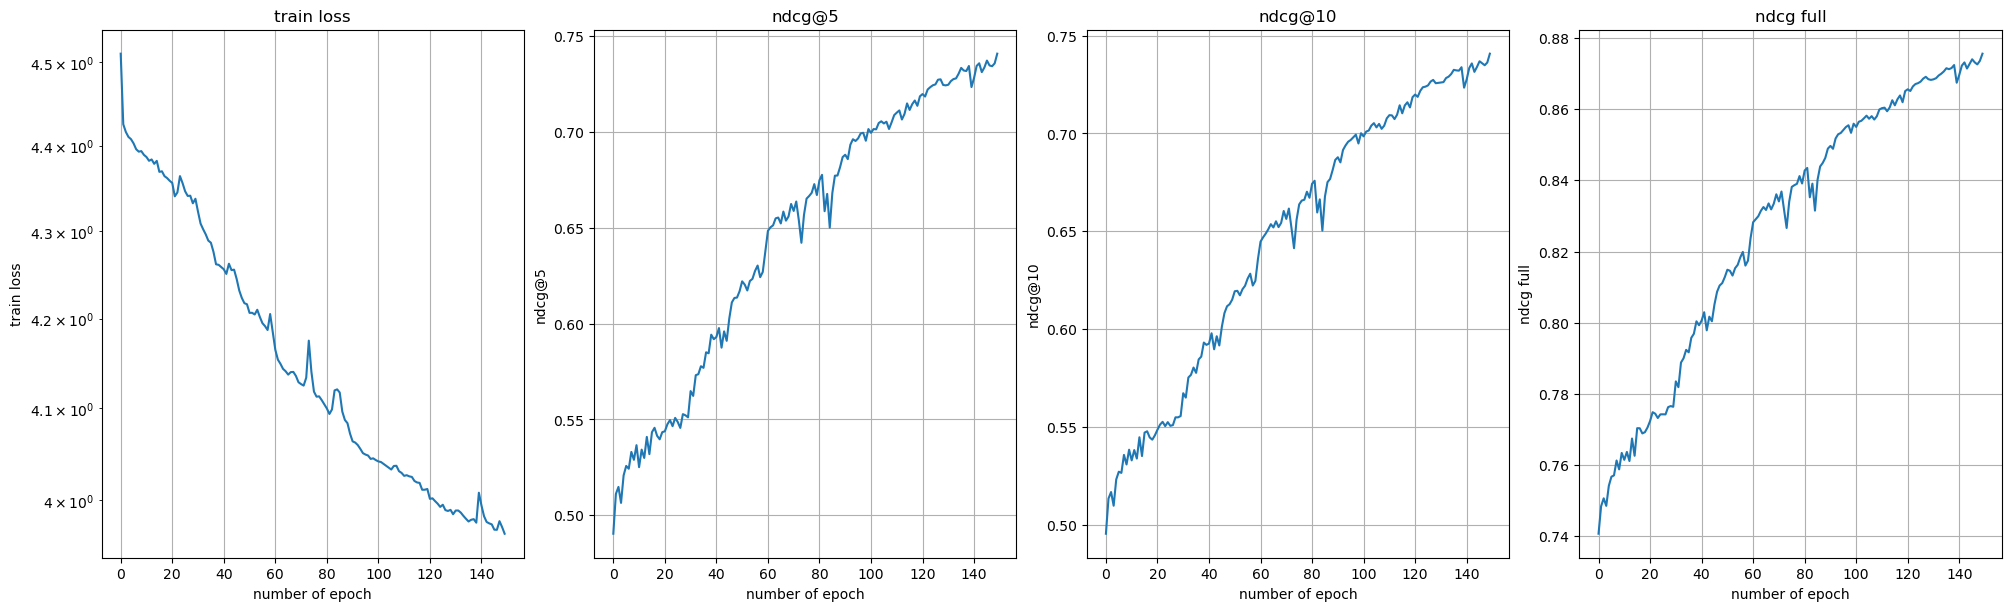

Epoch [150/150], Loss: 3.9640
Validation Loss: 9.5980 || NDCG@5 0.7408 || NDCG@10 0.7408 || Avg NDCG: 0.8756 


In [13]:
loss, mettrics = train_eval(**train_params)